# EPA Region 3 from Outer Space


The sample code below is a demo of the capabilities within the ArcGIS API for Python, including the creating of maps with imagery provided by NASA and USGS that contains data collected with Remote Sensing techniques.


## Web GIS Management

In [1]:
import arcgis
from arcgis.gis import GIS
from IPython.display import display

In [2]:
# Now I can skip typing all this: arcgis.gis.GIS
GIS

arcgis.gis.GIS

In [10]:
test_client_id = 'PaakBdazVTIn94uk'  #your App ID goes here
gis = GIS('https://epa.maps.arcgis.com', client_id=test_client_id)

#client_id='<myappid>'
#portal_gis = GIS('https://epa.maps.arcgis.com', "skenny02_EPA", "*")

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://epa.maps.arcgis.com/sharing/rest/oauth2/authorize?client_id=PaakBdazVTIn94uk&response_type=code&expiration=-1&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob
Enter code obtained on signing in using SAML: ········


In [11]:
# Connect to enterprise GIS
import arcgis.geoanalytics
author = gis.properties.user.username
author

'skenny02_EPA'

In [12]:
user = gis.users.search('Sharon Kenny')
print (user)

[<User username:skenny02_EPA>]


<User username:skenny02_EPA>
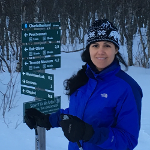

In [13]:
user[0]

## Searching the GPO

[<Item title:"JupyNotes" type:Dashboard owner:skenny02_EPA>, <Item title:"KennysNorge" type:Service Definition owner:skenny02_EPA>, <Item title:"MapNorge_SDKenny_WFL1" type:Service Definition owner:skenny02_EPA>, <Item title:"Region3_CongressionalDistricts_SDKenny" type:Insights Workbook owner:skenny02_EPA>, <Item title:"Norge" type:Layer Package owner:skenny02_EPA>, <Item title:"Stuff" type:Dashboard owner:skenny02_EPA>, <Item title:"PotterCountyTrees_SDKenny" type:Web Map owner:skenny02_EPA>, <Item title:"Kenny_FavoritesNorge" type:Service Definition owner:skenny02_EPA>, <Item title:"MODIS_Flooding" type:Web Map owner:skenny02_EPA>, <Item title:"EPA_sees_change_SDKenny" type:Native Application owner:skenny02_EPA>, <Item title:"Kennys in Norway" type:Feature Layer Collection owner:skenny02_EPA>, <Item title:"KennysNorge" type:Feature Layer Collection owner:skenny02_EPA>, <Item title:"Kennys in Norway" type:CSV owner:skenny02_EPA>, <Item title:"MapNorge_SDKenny" type:Web Map owner:sken

<Item title:"JupyNotes" type:Dashboard owner:skenny02_EPA>
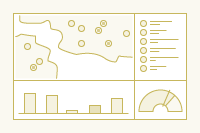

<Item title:"KennysNorge" type:Service Definition owner:skenny02_EPA>
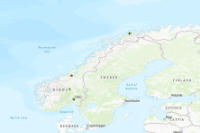

<Item title:"MapNorge_SDKenny_WFL1" type:Service Definition owner:skenny02_EPA>
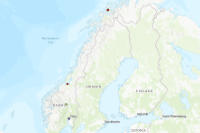

<Item title:"Region3_CongressionalDistricts_SDKenny" type:Insights Workbook owner:skenny02_EPA>
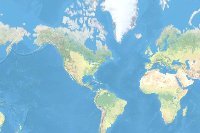

<Item title:"Norge" type:Layer Package owner:skenny02_EPA>
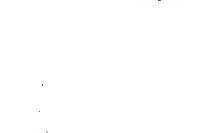

<Item title:"Stuff" type:Dashboard owner:skenny02_EPA>
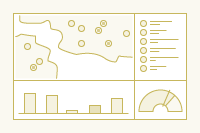

<Item title:"PotterCountyTrees_SDKenny" type:Web Map owner:skenny02_EPA>
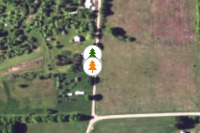

<Item title:"Kenny_FavoritesNorge" type:Service Definition owner:skenny02_EPA>
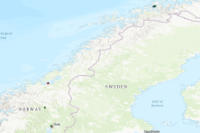

<Item title:"MODIS_Flooding" type:Web Map owner:skenny02_EPA>
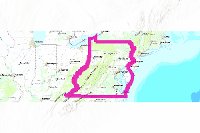

<Item title:"EPA_sees_change_SDKenny" type:Native Application owner:skenny02_EPA>
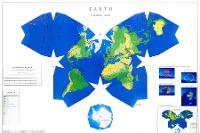

<Item title:"Kennys in Norway" type:Feature Layer Collection owner:skenny02_EPA>
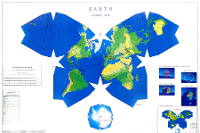

<Item title:"KennysNorge" type:Feature Layer Collection owner:skenny02_EPA>
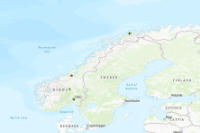

<Item title:"Kennys in Norway" type:CSV owner:skenny02_EPA>
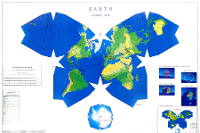

<Item title:"MapNorge_SDKenny" type:Web Map owner:skenny02_EPA>
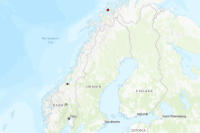

<Item title:"KennysNorge" type:WFS owner:skenny02_EPA>
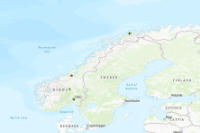

In [14]:
from IPython.display import display
items = gis.content.search("sdkenny", max_items=15)
print(items);
for item in items:
    display(item)

In [15]:
print(items[-1])

<Item title:"KennysNorge" type:WFS owner:skenny02_EPA>


In [16]:
map1 = gis.map("Tromso, Norway", 11)
map1

In [17]:
itemAdd = [item for item in items if item.title == "KennysNorge"]
print(itemAdd)

[<Item title:"KennysNorge" type:Service Definition owner:skenny02_EPA>, <Item title:"KennysNorge" type:Feature Layer Collection owner:skenny02_EPA>, <Item title:"KennysNorge" type:WFS owner:skenny02_EPA>]


In [18]:
layer1 = itemAdd[1]
map1.add_layer(layer1)

In [ ]:
#Focus the map to the part of the world containing the example item
#map1.extent = layer1.extent

## THE WEATHER

In [19]:
weather_item = gis.content.search('The Weather Company', outside_org=True)
weather_item

[<Item title:"The Weather Company Current Global Doppler Radar and Satellite Imagery" type:Web Map owner:jeffgawrych>,
 <Item title:"Boundary Waters Minnesota" type:Web Mapping Application owner:nygrenc>,
 <Item title:"City and Borough of Yakutat Basemap" type:Web Mapping Application owner:yakutatGIS>,
 <Item title:"Record-Setting Heat Across the U.S. in 2012" type:Document Link owner:ColletonGIS>,
 <Item title:"Primer asentamiento escoces en Panamá (Darién) - 1698" type:Web Map owner:mapasdigitales507>,
 <Item title:"IBM-The Weather Company Current Conditions Layers-Copia" type:Web Map owner:giulia3>,
 <Item title:"Tropical Storm Intensity Zones" type:Web Map owner:JamesGassonUNDP>,
 <Item title:"MoyturaMtRetreat" type:Map Package owner:jjnelson>,
 <Item title:"UNBEATABLE PRICED Tree Service" type:Web Map owner:TreeService09>,
 <Item title:"Dane County Weather Stations. Percent Service Occupations in the Private Company Sector." type:Web Map owner:mkubica>]

<Item title:"The Weather Company Current Global Doppler Radar and Satellite Imagery" type:Web Map owner:jeffgawrych>
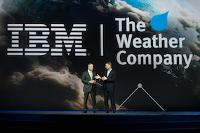

In [20]:
weather_item[0]

In [21]:
from arcgis.mapping import WebMap
weather = WebMap(weather_item[0])
weather

In [22]:
weather.values()

odict_values([[{'templateUrl': 'https://api.weather.com/v3/TileServer/tile/satrad?ts=1533262500&xyz={col}:{row}:{level}&apiKey=f60f9ecb790749d38f9ecb790729d3be', 'copyright': 'The Weather Company-IBM', 'fullExtent': {'xmin': -20037508.342787, 'ymin': -20037508.34278, 'xmax': 20037508.34278, 'ymax': 20037508.342787, 'spatialReference': {'wkid': 102100}}, 'opacity': 1, 'visibility': True, 'id': 'WebTiled_7300', 'title': 'Satellite and Radar as of 2018-08-03 02:15:00 UTC', 'type': 'WebTiledLayer', 'layerType': 'WebTiledLayer'}], {'baseMapLayers': [{'id': 'World_Hillshade_3805', 'layerType': 'ArcGISTiledMapServiceLayer', 'url': 'https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer', 'visibility': True, 'opacity': 1, 'title': 'World Hillshade'}, {'id': 'VectorTile_2333', 'type': 'VectorTileLayer', 'layerType': 'VectorTileLayer', 'title': 'World Topographic Map', 'styleUrl': 'https://www.arcgis.com/sharing/rest/content/items/7dc6cea0b1764a1f9af2e679f642f

### LANDSAT

This notebook uses Landsat 8 imagery layer that is accessible from ArcGIS Online. The Landsat 8 imagery layer provides multiple scenes for every location and is updated with new scenes every day from USGS. The scenes can be used for both visualization and analysis. Typically, all locations are covered every 16 days.

In [23]:
from arcgis.raster.functions import *

In [24]:
landsat_item = gis.content.search('"Landsat Multispectral"', 'Imagery Layer', outside_org=True)[0]

<Item title:"Landsat_Multispectral" type:Imagery Layer owner:Craig_ESRIAU>
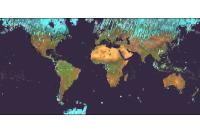

In [25]:
landsat_item

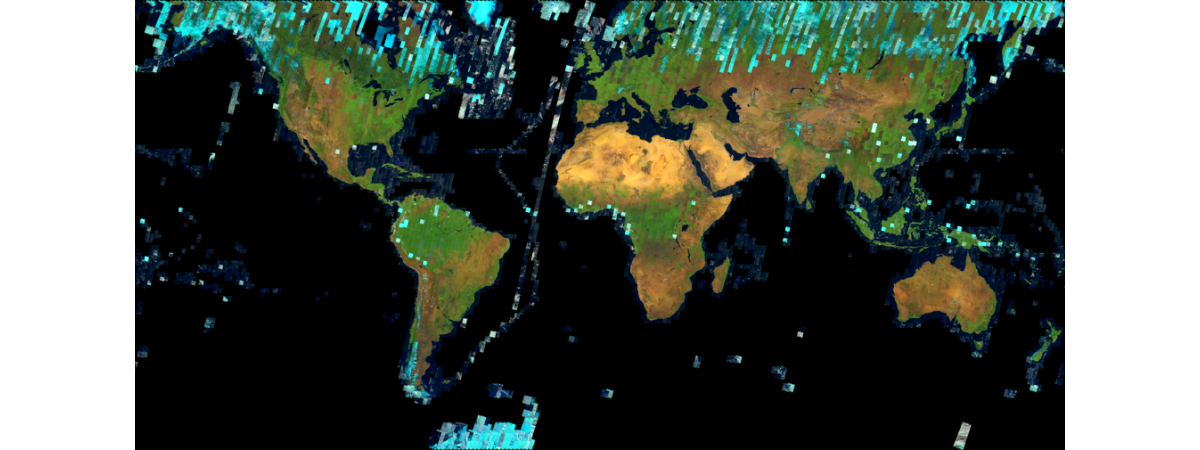

In [26]:
landsat = landsat_item.layers[0]
landsat

#### Raster processing

The examples below will be extracting a particular band combination from the landsat layer, and applying a 'Percent Clip' stretch to enhance the raster so it looks more vibrant. Here, we define a Python function that will first use the `extract_band` raster function to extract the specified band combination from the input raster, and then feed the output to the `stretch` raster function. This function will be used by each example below to display different points of interest around the world.  (Reference: Esri)

In [27]:
def extract_stretch(bandids):
    return stretch(extract_band(landsat, bandids),
                   stretch_type='PercentClip',
                   min_percent=2, 
                   max_percent=2,
                   dra=True, 
                   gamma=[0.8,0.8,0.8])

## Philadelphia


Green vegetation appears green in this band combination. The blue band is set to the blue channel here, so the water appears blue.

In [28]:
philly = gis.map('Philadelphia. PA', 10)
philly

In [29]:
philly.add_layer(extract_stretch([5, 4, 1]))

## Erie, PA

Bands that accentuate geologic structure. These particular bands are not always used for geology, site specific minerals and characteristics may call for a different combination.

In [54]:
erie = gis.map("erie, pa", 11)
erie

In [55]:
erie.add_layer(extract_stretch([6, 3, 1]))

## Wheeling, WV



Short-wave Infrared with DRA (7,6,4): This band combination is used so that green vegetation appears green in the image.

In [56]:
wheel = gis.map("wheeling, wv", 10)
wheel

In [57]:
wheel.add_layer(extract_stretch([6, 5, 3]))

IMPORTING DATA FROM A PANDAS DATA FRAME

In [30]:
import pandas

In [33]:
# search if item exists first!!!

csvPath = r'S:\training\StudyGroups\ArcGIS_API_for_Python\Kennys_FavoritePlacesNorway2018.csv'
csvProp = {'title': 'Kennys in Norway', 
           'description': 'Trips on 2016 and 2017', 
           'tags': 'SDKenny, EPA, Norge, Norway'}
thumbPath = 'S:/training/StudyGroups/ArcGIS_API_for_Python/butter.png'


<Item title:"Kennys in Norway" type:CSV owner:skenny02_EPA>
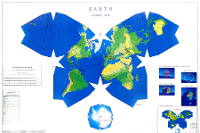

In [34]:
Norge_csv_item2018 = gis.content.add(item_properties = csvProp, data = csvPath, thumbnail = thumbPath)
Norge_csv_item2018

In [ ]:
# Norge_csv_item2018.publish()
# Code above similar to "content.add"

In [ ]:
# gis.content.search(query="group:47dd57c9a59d458c86d3d6b978560088", outside_org=True) 
# Living Atlas

In [35]:
Norge_csv_item2018.share(org = True)


{'itemId': '8ea26c6b83e44bd6aeb04f04f8f7e023', 'notSharedWith': []}

In [36]:
sitesNorge = pandas.read_csv(csvPath)
sitesNorge

,name,address,latitude,longitude,place
0,Holmenkollen Scandic Park,"Kongeveien 26, 0787 Oslo, Norway",59.962589,10.662336,Hotel
1,Yo! Sushi,"Jernbanetorget 1, 0154 Oslo, Norway",59.912331,10.750975,Restaurant
2,Casa Inferno,"Vestregata 2, 9008 Tromsø, Norway",69.648621,18.951467,Restaurant
3,Clarion Hotel The Edge,"Kaigata 6, 9008 Tromsø, Norway",69.647285,18.957175,Hotel
4,Tromso Museum,"Lars Thørings veg 10, 9006 Tromsø, Norway\n\n",69.636790,18.922047,University
5,Universitat I Tromso,"Hansine Hansens veg 18, 9019 Tromsø, Norway",69.681072,18.978287,University
6,Prestvannet,"9011 Tromsø, Norway",69.660167,18.943959,Park
7,Polaria,"Hjalmar Johansens gate 12, 9296 Tromsø, Norway",69.644767,18.954602,Museum
8,Polarmuseet i Tromsø,"Søndre Tollbodgate 11B, 9008 Tromsø, Norway",69.653483,18.971597,Museum
9,Kvitfjell,"Kvitfjellvegen 471, 2634 Fåvang, Norway",61.470949,10.137169,Park


In [37]:
# Creating a feature collection (fc)
sitesNorge_fc = gis.content.import_data(sitesNorge)
sitesNorge_fc

<FeatureCollection>

In [62]:
norway = gis.map("Norway")
norway

In [63]:
norway.add_layer(sitesNorge_fc)

### BIG DATA

In [38]:
# Hurricanes
arcgis_online = GIS()
hurricane_pts = arcgis_online.content.search("Hurricane_tracks_points AND owner:atma.mani", "Feature Layer")[0]
hurricane_pts

<Item title:"Hurricane_tracks_points" type:Feature Layer Collection owner:atma.mani>

In [39]:
gis = GIS("https://pythonapi.playground.esri.com/portal", "arcgis_python", "amazing_arcgis_123")

In [40]:
datastores = arcgis.geoanalytics.get_datastores()
bigdata_fileshares = datastores.search()
bigdata_fileshares

[<Datastore title:"/bigDataFileShares/NYC_taxi_data15" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/all_hurricanes" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/hurricanes_1848_1900" type:"bigDataFileShare">]

In [41]:
data_item = bigdata_fileshares[1]

In [42]:
data_item.manifest['datasets'][0]

{'format': {'extension': 'shp', 'type': 'shapefile'},
 'geometry': {'geometryType': 'esriGeometryPoint',
  'spatialReference': {'wkid': 4326}},
 'name': 'hurricanes',
 'schema': {'fields': [{'name': 'serial_num', 'type': 'esriFieldTypeString'},
   {'name': 'season', 'type': 'esriFieldTypeBigInteger'},
   {'name': 'num', 'type': 'esriFieldTypeBigInteger'},
   {'name': 'basin', 'type': 'esriFieldTypeString'},
   {'name': 'sub_basin', 'type': 'esriFieldTypeString'},
   {'name': 'name', 'type': 'esriFieldTypeString'},
   {'name': 'iso_time', 'type': 'esriFieldTypeString'},
   {'name': 'nature', 'type': 'esriFieldTypeString'},
   {'name': 'latitude', 'type': 'esriFieldTypeDouble'},
   {'name': 'longitude', 'type': 'esriFieldTypeDouble'},
   {'name': 'wind_wmo_', 'type': 'esriFieldTypeDouble'},
   {'name': 'pres_wmo_', 'type': 'esriFieldTypeBigInteger'},
   {'name': 'center', 'type': 'esriFieldTypeString'},
   {'name': 'wind_wmo1', 'type': 'esriFieldTypeDouble'},
   {'name': 'pres_wmo1', 'ty

In [43]:
search_result = gis.content.search("", item_type = "big data file share")
search_result

[<Item title:"bigDataFileShares_all_hurricanes" type:Big Data File Share owner:api_data_owner>,
 <Item title:"bigDataFileShares_hurricanes_1848_1900" type:Big Data File Share owner:arcgis_python>,
 <Item title:"bigDataFileShares_NYC_taxi_data15" type:Big Data File Share owner:api_data_owner>]

In [44]:
data_item = search_result[0]
data_item

<Item title:"bigDataFileShares_all_hurricanes" type:Big Data File Share owner:api_data_owner>

In [45]:
years_all = data_item.layers[0]
years_all

<Layer url:"https://pythonapi.playground.esri.com/ga/rest/services/DataStoreCatalogs/bigDataFileShares_all_hurricanes/BigDataCatalogServer/hurricanes">

In [46]:
from arcgis.geoanalytics.summarize_data import reconstruct_tracks

In [47]:
arcgis.env.verbose = True

In [48]:
agg_result = reconstruct_tracks(years_all, 
                                track_fields='Serial_Num',
                                method='GEODESIC')

Submitted.
Executing...
Executing (ReconstructTracks): ReconstructTracks "Feature Set" Serial_Num Geodesic # # # # # # "{"serviceProperties": {"name": "Reconstructed_Tracks_2FY4MA", "serviceUrl": "https://pythonapi.playground.esri.com/server/rest/services/Hosted/Reconstructed_Tracks_2FY4MA/FeatureServer"}, "itemProperties": {"itemId": "21482087416c45d29788be46dca84ee0"}}" #
Start Time: Fri Aug 03 02:48:04 2018


Attaching log redirect
Log level set to DEBUG


Attaching log redirect
Log level set to DEBUG
[DEBUG|02:48:04] Current Service Environment: GPServiceEnvironment(j9986fd06c6384c668439df0445df8f34,/gisdata/arcgisserver/directories/arcgisjobs/system/geoanalyticstools_gpserver/j9986fd06c6384c668439df0445df8f34,Some(GPServiceRequest(Some(aFdGJDTdjleiNxpQBeu6owa9yzQobuyGqfBfoTdyoL_muButdjWEK4FbWltlsR2GS1CFx9nOduQMNESArp_CN2gtvviITh8yj4BGmwqOflKb9dr3z8PHQxkT-xwjhEta),None,Some(http))),System/GeoAnalyticsTools,GPServer,Map(maxAllowedComputeCoresPerJob -> 4, jobsVirtualDirectory -> /rest/directories/arcgisjobs, jobsDirectory -> /gisdata/arcgisserver/directories/arcgisjobs, virtualOutputDir -> /rest/directories/arcgisoutput, maxAllowedMemoryPerJobPerNode -> 6, showMessages -> Info, outputDir -> /gisdata/arcgisserver/directories/arcgisoutput, javaHeapSize -> 2048, maximumRecords -> 1000, toolbox -> ${AGSSERVER}/ArcToolBox/Services/GeoAnalytics Tools.tbx, executionType -> Asynchronous, renewTokens -> true, _debugModeEnabled -> true))
[DEBUG|02:

Detaching log redirect


Detaching log redirect
Succeeded at Fri Aug 03 02:49:09 2018 (Elapsed Time: 1 minutes 5 seconds)


In [49]:
processed_map = gis.map("USA")
processed_map

In [50]:
processed_map.add_layer(agg_result)